In [19]:

import matplotlib.pyplot as plt
import pickle
import numpy as np
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [21]:


# filepath = sys.argv[1]
stim_type = 'smooth'
# param = sys.argv[3]
# val = sys.argv[4]
# par = f'{param}_{val}'

net = 'Reciporcal_mono_linear_heavy_maxan_equalweight/noGCGainControl'

# load dataframe 
response_data = pd.read_csv(f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net}/responses_RG_mu3.csv')


# load dataframe 
df = pd.read_csv(f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net}/anticipation_data_mu3.csv')


print(df.columns)

# calculate anticipation with respect to V_drive
df['ant_RG_drive_time']  =  df['peak_drive'] - df['peak_RG'] 
df['ant_RG_drive_space'] = df['ant_RG_drive_time']* df['speed']

# calculate anticipation with respect to 
df['ant_RG_bar_time']  = df['tp_rf_GC_mid'] - df['peak_RG'] 
df['ant_RG_bar_space'] = df['ant_RG_bar_time']* df['speed']

df['wTOT'] = -1*df['wTOT']
df['mu2'] = df['wTOT']* (df['tauTOT']**2)
df['mu2norm'] = (df['mu2']-df['mu2'].mean())/df['mu2'].std()
df['mu2r'] = df['mu2'].round()
df['tauTOT'] = df['tauTOT'].round()
df['wTOT'] = df['wTOT'].round()
# multiple heatmaps, keeping w+ fixed and changing w-
#dfgrouped = df.groupby(['wAB'])


speeds = df['speed'].unique()#[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0]

mus = df['mu'].unique()
mus2 = df['mu2'].unique()




Index(['Unnamed: 0', 'wBA', 'wAB', 'tauA', 'tauB', 'mu', 'speed', 'peak_RG',
       'peak_RB', 'peak_drive', 'tp_rf_GC_mid', 'peak_RG_pooling',
       'peak_RB_pooling', 'onset_RB', 'onset_RG', 'onset_RB_pooling',
       'onset_RG_pooling', 'tauTOT', 'wTOT'],
      dtype='object')


In [22]:
var = 'ant_RG_bar_space'

In [23]:

var2 = 'mu2r'
cNorm = colors.Normalize(vmin =df[var2].min(), vmax = df[var2].max())
cmap = plt.get_cmap('viridis', len(df[var2].unique()))

scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)




var2 = 'mu2r'
cNorm = colors.Normalize(vmin =0, vmax =  len(df[var2].unique()))
cmap = plt.get_cmap('viridis', len(df[var2].unique()))

scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)



58401600.0
diff                                               0.011275
mu                                               58401600.0
wTOT                                                 4416.0
tauTOT                                               -115.0
tauA      79     0.1
279    0.1
479    0.1
679    0.1
87...
wBA       79     96.0
279    96.0
479    96.0
679    96....
Name: 186, dtype: object
58401600.0
Unnamed: 0            3.990000e+02
wBA                   9.600000e+01
wAB                   4.600000e+01
tauA                  2.800000e-01
tauB                  8.000000e-03
mu                   -6.511347e+07
speed                 4.000000e-01
peak_RG               1.724000e+00
peak_RB               1.612000e+00
peak_drive            1.966000e+00
tp_rf_GC_mid          1.881229e+00
peak_RG_pooling       1.972000e+00
peak_RB_pooling       1.976000e+00
onset_RB              1.424000e+03
onset_RG              1.140000e+03
onset_RB_pooling      1.416000e+03
onset_RG_pooling      1.022000e+0

AttributeError: 'Figure' object has no attribute 'lengend'

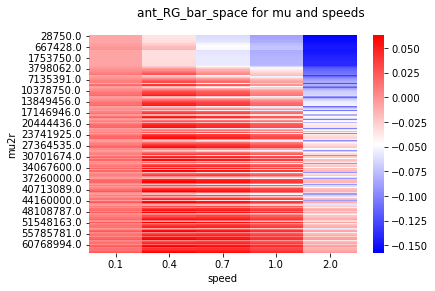

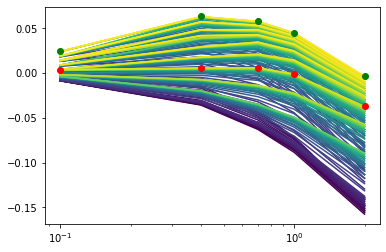

In [24]:
fig = plt.figure()
fig.tight_layout()
fig.suptitle(f'{var} for mu and speeds')


fig2 = plt.figure()
fig2.tight_layout()
#weights = [0.0,10.0,50.0,100.0]

ax = fig.add_subplot(1,1,1)
# plot heatmap for beta
g_heatmap = df.pivot_table(index = 'mu2r',columns = 'speed',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, ax = ax, cmap = 'bwr')#,  vmin=-0.2, vmax=0.2)

subg = df.groupby(['mu2r'])
ax = fig2.add_subplot(1,1,1)
ax.set_xscale('log')


# get values for which difference across speed is minimal
diffsdf = pd.DataFrame(columns = ['diff', 'mu','wTOT','tauTOT', 'tauA', 'wBA'])


# get values that yield same anticipation time across speeds

for x,w2 in enumerate(subg.groups):
    sg = subg.get_group(w2)

    ax.plot(sg['speed'], sg[var], label = f'mu = {w2}',color = scalarMap.to_rgba(x))

    diff = np.mean(np.abs(np.diff(sg[var])))
    data = {'diff': diff,
            'mu' : w2,
            'wTOT': sg['wTOT'].min(),
            'tauTOT': sg['tauTOT'].min(),
            'tauA':sg['tauA'],
            'wBA': sg['wBA']}
    diffsdf = diffsdf.append(data, ignore_index = True)



    # if x == len(subg.groups)-100:
    #     plt.scatter(sg['speed'], sg[var], label = f'mu = {w2}',color = 'r', zorder = len(subg.groups))
    #sg.plot( x = 'speed', y = 'ant_RG_drive_space', label =f'wBA = {w2}', ax = ax)


# get mu for minimal difference between speeds
mi= diffsdf['diff'].argmin()
mimu = diffsdf['mu'][mi]
sg = subg.get_group(mimu)
print(mimu)
print(diffsdf.iloc[mi])
ax.scatter(sg['speed'], sg[var], label = f'mu = {w2}',color = 'r', zorder = len(subg.groups))



#get mu for maximal anticipation
ma = df['ant_RG_bar_space'].argmax()
mamu = df['mu2r'][ma]
sg = subg.get_group(mamu)
print(mimu)
print(df.iloc[ma])
ax.scatter(sg['speed'], sg[var], label = f'mu = {w2}',color = 'g', zorder = len(subg.groups))


fig2.lengend()


# fig3 = plt.figure()
# ax = fig3.add_subplot(111)
# ax.scatter(diffsdf.iloc[mi]['wBA'],diffsdf.iloc[mi]['tauA'])


#fig2.legend()


In [37]:
# extract values for minimal difference
tauTOTmindiff = diffsdf.iloc[mi]['tauTOT']
wTOTmindiff = diffsdf.iloc[mi]['wTOT']

# extract values for same anticipation


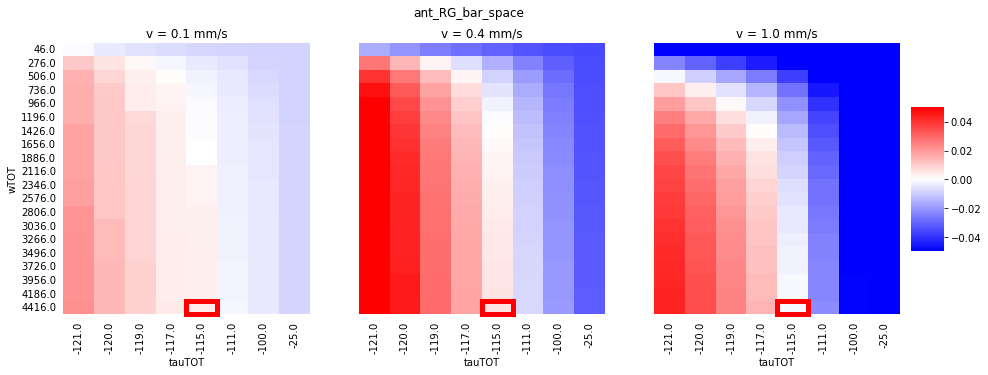

In [38]:

fig = plt.figure(figsize = (15,5))
fig.suptitle(f'{var}')

cbar_ax = fig.add_axes([.91, .3, .03, .4])

s = 0.1
ax = fig.add_subplot(131)
ax.set_title(f'v = {s} mm/s')
dfg = df.groupby('speed')
dfs = dfg.get_group(s)

# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'wTOT',columns = 'tauTOT',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-0.05, vmax=0.05, cbar=None)
ax.tick_params(left=False, bottom=False)

t = g_heatmap.columns == tauTOTmindiff
col = t.nonzero()[0][0]

t = g_heatmap.index == wTOTmindiff
ind = t.nonzero()[0][0]
ax.add_patch(plt.Rectangle((col, ind), 1, 1, fc='none', ec='red', lw=5, clip_on=False))

s = 0.4
ax = fig.add_subplot(132)
ax.set_title(f'v = {s} mm/s')
dfs = dfg.get_group(s)
# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'wTOT',columns = 'tauTOT',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-0.05, vmax=0.05, cbar=None, yticklabels=False)
ax.tick_params(left=False, bottom=False)
ax.set_ylabel('')

t = g_heatmap.columns == tauTOTmindiff
col = t.nonzero()[0][0]

t = g_heatmap.index == wTOTmindiff
ind = t.nonzero()[0][0]
ax.add_patch(plt.Rectangle((col, ind), 1, 1, fc='none', ec='red', lw=5, clip_on=False))

s = 1.0
ax = fig.add_subplot(133)
ax.set_title(f'v = {s} mm/s')
dfs = dfg.get_group(s)

# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'wTOT',columns = 'tauTOT',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-0.05, vmax=0.05, yticklabels=False, cbar_ax=cbar_ax)
ax.tick_params(left=False, bottom=False)
ax.set_ylabel('')

# highlight min difference combi

t = g_heatmap.columns == tauTOTmindiff
col = t.nonzero()[0][0]

t = g_heatmap.index == wTOTmindiff
ind = t.nonzero()[0][0]
ax.add_patch(plt.Rectangle((col, ind), 1, 1, fc='none', ec='red', lw=5, clip_on=False))


# highlight comy that gives equal anticipation



In [ ]:
# extract w and tau with good anticipation

